# Handwritten Digit Recognition

https://www.youtube.com/watch?v=bte8Er0QhDg

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Training data

This is a dataset of 60,000 28x28 grayscale images of handwritten digits, along with a test set of 10,000 images.

In [2]:
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

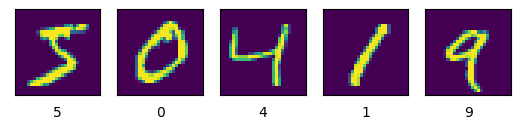

In [3]:
# show a few images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

## Preprocessing

In [4]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Model

In [5]:
model = tf.keras.models.Sequential()

# Model layers
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # turns 28x28 2D array into 1D array of 784 pixels
model.add(tf.keras.layers.Dense(128, activation='relu')) # 128 neurons, rectified linear unit
model.add(tf.keras.layers.Dense(128, activation='relu')) # 128 neurons, rectified linear unit
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 neurons representing the 10 digits, softmax (confidence for each digit)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [6]:
model.fit(x_train, y_train, epochs=10)
model.save('digit_reader.model')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2673 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1094 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0174 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

## Evaluation

In [7]:
# model = tf.keras.models.load_model('digit_reader.model')

loss, accuracy = model.evaluate(x_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9722
Loss:  0.1158938929438591
Accuracy:  0.9721999764442444


## Prediction

1/1 [==============================] - 0s 23ms/step


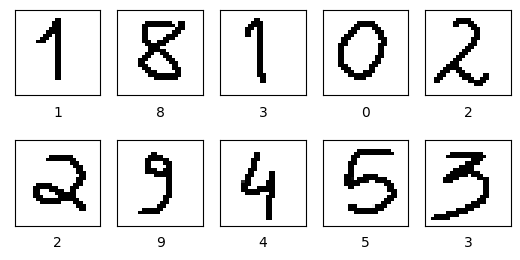

In [8]:
# Read digits we made on Ms Paint :)
image_number = 1
for _ in os.listdir('digits'):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png", cv2.IMREAD_GRAYSCALE)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        # Show the images in a grid
        plt.subplot(3, 5, image_number)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.xlabel(np.argmax(prediction))
        image_number += 1
    except Exception as e:
        pass

1/1 [==============================] - 0s 23ms/step


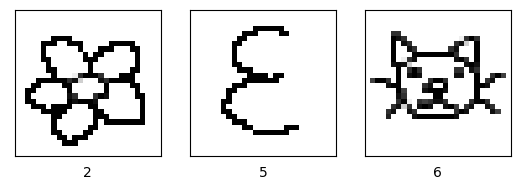

In [9]:
# Not digits
image_number = 1
for _ in os.listdir('digits/notadigit'):
    try:
        img = cv2.imread(f"digits/notadigit/notadigit{image_number}.png", cv2.IMREAD_GRAYSCALE)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        # Show the images in a grid
        plt.subplot(1, 3, image_number)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.xlabel(np.argmax(prediction))
        image_number += 1
    except Exception as e:
        pass